In [136]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Đọc file ảnh "Lenna.png"

In [137]:
img = cv2.imread(r"Lenna.png")

Đổi ảnh từ chế độ BGR về chế độ màu RGB

In [138]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Hiển thị ảnh

(-0.5, 511.5, 511.5, -0.5)

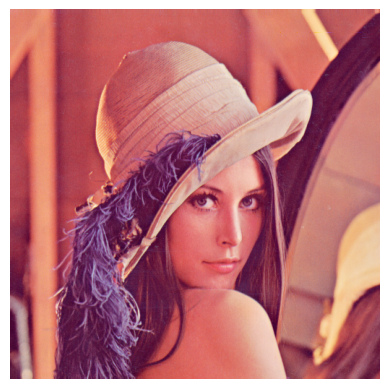

In [139]:
plt.imshow(img)
plt.axis('off')

Kích thước ảnh

In [140]:
print(img.shape)

(512, 512, 3)


Vì là ảnh màu nên sẽ có 3 channel tượng trưng cho 3 kênh màu R,G,B<br>
Size ảnh hiện tại là 512x512

# Color Transformation

Chuyển đổi ảnh qua trắng đen 

Hàm trong thư viện

In [141]:
im_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY) # hàm built-in opencv


(-0.5, 511.5, 511.5, -0.5)

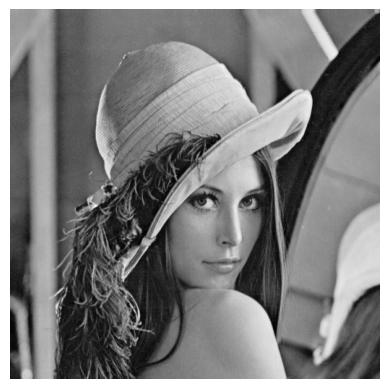

In [142]:
plt.imshow(im_gray,cmap='gray')
plt.axis('off')

Chuyển đổi thủ công

In [143]:
# chuyển đổi từ RGB về grayscale
def RGB2GrayScale(image):
    # tách 3 kênh màu của ảnh
    red, green, blue = image[:,:,0], image[:,:,1], image[:,:,2]
    r_const, g_const, b_const = 0.3, 0.59, 0.11 # khai báo các hằng số của các kênh.
    res = r_const*red + g_const*green + b_const*blue
    return res

Kết quả thủ công

(-0.5, 511.5, 511.5, -0.5)

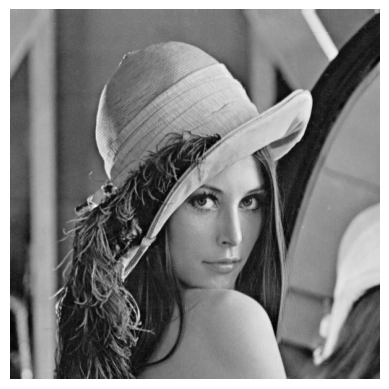

In [144]:
grayscale = RGB2GrayScale(img)
plt.imshow(grayscale,cmap='gray')
plt.axis('off')

So sánh kết quả của 2 hàm chuyển đổi RGB sang GrayScale:<br>
+) Hàm của thư viện (ảnh trái)<br>
+) Hàm thủ công (ảnh phải)

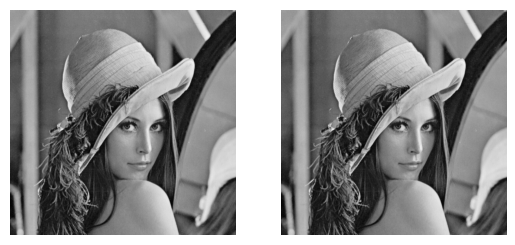

In [145]:
fig,(ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(im_gray,cmap='gray')
ax1.axis('off')
plt.axis('off')
ax2.imshow(grayscale,cmap='gray')

Thay đổi độ sáng
g(x,y) = f(x,y) + a

In [202]:
gray_after = grayscale - 312.95 # a > 0 là tăng độ sáng, a < 0 là giảm dộ sáng

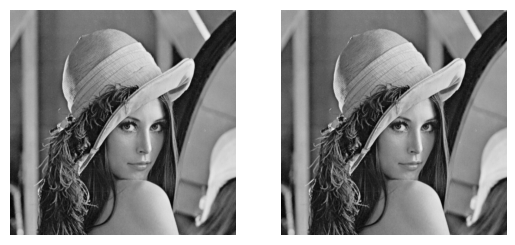

In [203]:
fig,(ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(grayscale, cmap = 'gray')
ax1.axis('off')
ax2.axis('off')
ax2.imshow(gray_after, cmap = 'gray')

Thay đổi độ tương phản g(x,y) = a*f(x,y)

In [196]:
gray_after = grayscale*-2 # a > 0 là tăng độ tương phản, a < 0 là giảm độ tương phản

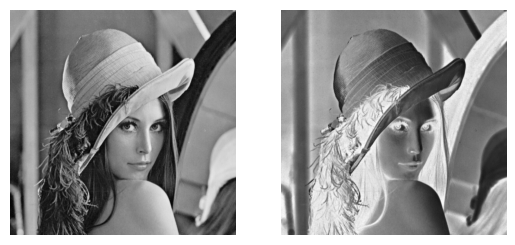

In [197]:
fig,(ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(grayscale, cmap = 'gray')
ax1.axis('off')
ax2.axis('off')
ax2.imshow(gray_after, cmap = 'gray')

# Transform Geometry

Resize image<br>
Hàm thư viện

(-0.5, 1023.5, 1023.5, -0.5)

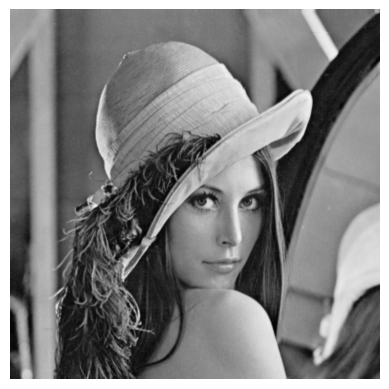

In [148]:
double_sized = cv2.resize(im_gray, dsize=None, fx = 2, fy = 2, interpolation = cv2.INTER_LINEAR) # phóng to ảnh to gấp 2 lần
# INTER_LINEAR – Linear interpolation.
plt.imshow(double_sized,cmap='gray')
plt.axis('off')
# size picture lúc sau là 1023.5 x 1023.5

Hàm thủ công (dùng thuật toán Linear Interpolation và thủ thuật inverting the planar transformation)<br>
(x,y) = T^-1 * (x',y')

In [149]:
# Linear Interpolation
def LinearInterpolate(r,c,I):
    # Lấy các thông số dòng, cột của phạm vi bao quanh điểm có tọa độ (r,c)
    left_col = int(c)
    right_col = left_col+1
    top_row = int(r)
    bottom_row = top_row+1

    # Tính khoảng cách giữa điểm (r,c) với các cạnh bao quanh điểm đó.
    weight_right = c - left_col
    weight_left = right_col - c
    weight_top = bottom_row-r
    weight_bot = r-top_row

    # kiểm tra điều khiện phạm vi điểm nằm trong vùng.
    if top_row >= 0 and bottom_row < I.shape[0] and left_col >=0 and right_col < I.shape[1]:
        a = weight_left * I[top_row,left_col] + weight_right * I[top_row,right_col]
        b = weight_left * I[bottom_row,left_col] + weight_right * I[bottom_row,right_col]
        g = weight_top * a + weight_bot * b
        return np.uint8(g)
    else:
        return 0
        
        

In [150]:
def get_scaling_matrix(scale): # tạo ma trận để scale ảnh.
    size = len(scale)
    matrix = np.zeros((size,size))
    for i,_ in enumerate(matrix):
        matrix[i][i] = scale[i]
    return matrix
    
def scaleImage(scale,I_gray): # hàm scale ảnh.
    numRows = I_gray.shape[0]
    numCols = I_gray.shape[1]
    S = get_scaling_matrix(scale)

    resized = np.zeros((int(scale[0])*numRows,int(scale[1])*numCols),dtype='uint8')
    Tinv = np.linalg.inv(S) # T = Nghịch đảo của ma trận S
    for new_i in range(resized.shape[0]):
        for new_j in range(resized.shape[1]):
            P_dash = np.array([new_i,new_j])
            P = Tinv.dot(P_dash)

            i , j = P[0] , P[1] # lấy giá trị tọa độ row và col của P
            if i < 0 or i >= numRows or j < 0 or j >= numCols: # bỏ các điểm nằm ngoài vùng
                pass
            else:
                g = LinearInterpolate(i,j,I_gray)
                resized[new_i,new_j] = g
    return resized

Kết quả thủ công

(-0.5, 1023.5, 1023.5, -0.5)

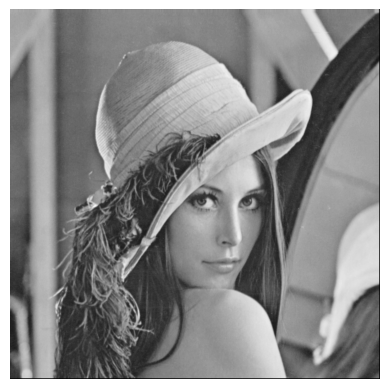

In [151]:
scale = [2,2] # ma trận hệ số để scale ảnh theo trục x và trục y
draft = scaleImage(scale,im_gray)
plt.imshow(draft,cmap='gray')
plt.axis('off')
# size picture lúc sau khi chạy hàm thủ công là 1023.5 x 1023.5 (giống với kết quả chạy đối với thư viện)

So sánh 2 kết quả của Hàm resize (Thuật toán Linear Interpolation) :<br>
+) Hàm của thư viện (ảnh trái)<br>
+) Hàm thủ công (ảnh phải)

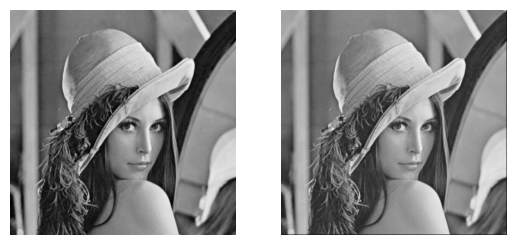

In [152]:
fig,(ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(double_sized, cmap='gray')
ax1.axis('off')
plt.axis('off')
ax2.imshow(draft, cmap='gray')

# Image Smoothing

Hàm thư viện (Average smoothing)

(-0.5, 511.5, 511.5, -0.5)

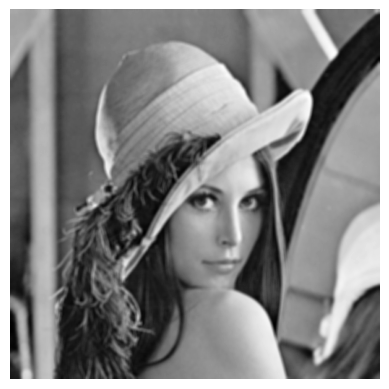

In [214]:
avging = cv2.blur(im_gray,(5,5))
plt.imshow(avging, cmap='gray')
plt.axis('off')


Hàm thủ công (Average smoothing)

In [215]:
def AverageBluring(image): # kernel filter matrix size = 5x5
    mask = np.ones((5, 5)) 
    mask = mask / 25 # [1/(width*height)]*mask
    img_new = cv2.filter2D(image,-1,mask)
    return img_new

(-0.5, 511.5, 511.5, -0.5)

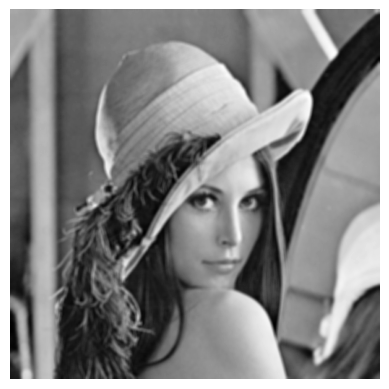

In [216]:
smooth = AverageBluring(im_gray)
plt.imshow(smooth, cmap='gray')
plt.axis('off')

Hàm thủ công (Median Bluring)


In [211]:
def median_filter(img, filter_size):
    temp = []
    indexer = filter_size // 2 # lấy chỉ số trung vị của filter

    rows, cols = len(img),len(img[0])

    final_img = []
    final_img = np.zeros((rows,cols))
    for i in range(rows):
        for j in range(cols):
            for z in range(filter_size):
                if i + z - indexer < 0 or i + z - indexer > len(img) - 1:
                    for c in range(filter_size):
                        temp.append(0) # add các giá trị 0 nếu nằm ngoài filter
                else:
                    if j + z - indexer < 0 or j + indexer > len(img[0]) - 1:
                        temp.append(0) # add các giá trị 0 nếu nằm ngoài filter
                    else:
                        for k in range(filter_size):
                            temp.append(img[i + z - indexer][j + k - indexer]) # add các giá trị pixel nằm trong filter

            temp.sort() # sắp xếp theo thứ tự giảm dần
            final_img[i][j] = temp[len(temp) // 2] # lấy giá trị trung vị (median)
            temp = []
    return final_img

(-0.5, 511.5, 511.5, -0.5)

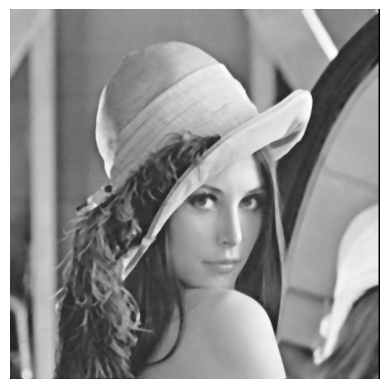

In [212]:
med = median_filter(im_gray, filter_size = 5)
plt.imshow(med, cmap='gray')
plt.axis('off')

So sánh kết quả của 2 hàm Average Smoothing và Median filter:<br>
+) Hàm của thư viện (ảnh trái)<br>
+) Hàm thủ công Average (ảnh giữa)<br>
+) Hàm thủ công Median (ảnh phải)

(-0.5, 511.5, 511.5, -0.5)

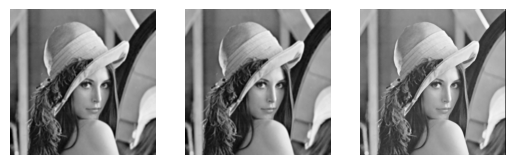

In [217]:
fig,(ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(avging, cmap='gray')
ax1.axis('off')
ax2.imshow(smooth, cmap='gray')
ax2.axis('off')
ax3.imshow(med, cmap='gray')
ax3.axis('off')

# Cài đặt Edge Detection

In [157]:
# size picture
print(im_gray.shape)

(512, 512)


Xử lý Edge Detection bằng thư viện có sẵn trong OpenCV

In [158]:
Cannyon = cv2.Canny(im_gray,threshold1=140, threshold2=180)
# lower threshold = 140, upper threshold = 180

(-0.5, 511.5, 511.5, -0.5)

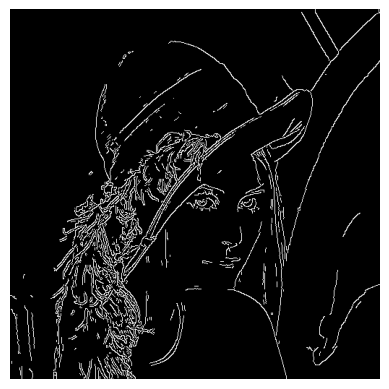

In [159]:
plt.imshow(Cannyon, cmap='gray')
plt.axis('off')

Xử lý Edge Detection bằng thuật toán tự cài đặt

Hàm lọc ảnh Gaussian (Công đoạn Noise Supression)

In [160]:
def GaussianFilter(size = 5,sigma = 1): # Gaussian Filter
    maxX = size//2 # maximum number of steps -> lấy giá trị nguyên
    minX = -maxX
    minY = minX
    maxY = maxX
    G = np.zeros((size,size)) # khởi tạo kernel filter
    for x in range(minX, maxX + 1):
        for y in range(minY, maxY + 1): # the last step is included
            value = (1/(2*np.pi*(sigma**2)))*np.exp(-(x**2 + y**2)/(2*(sigma**2)))
            G[x-minX,y-minY] = value
    return G

Filter Kernel với size là 5x5

In [161]:
maskG = GaussianFilter()
print(maskG)

[[0.00291502 0.01306423 0.02153928 0.01306423 0.00291502]
 [0.01306423 0.05854983 0.09653235 0.05854983 0.01306423]
 [0.02153928 0.09653235 0.15915494 0.09653235 0.02153928]
 [0.01306423 0.05854983 0.09653235 0.05854983 0.01306423]
 [0.00291502 0.01306423 0.02153928 0.01306423 0.00291502]]


Lọc ảnh với kernel vừa khởi tạo

In [162]:
img_S = cv2.filter2D(im_gray,-1,maskG) # dịch chuyển maskG tới mọi pixels trong im_gray và tính toán lọc ảnh
# -1 được dùng để duy trì kích thước ảnh gốc

Kết quả sau khi lọc ảnh (Gaussian Filter).

(-0.5, 511.5, 511.5, -0.5)

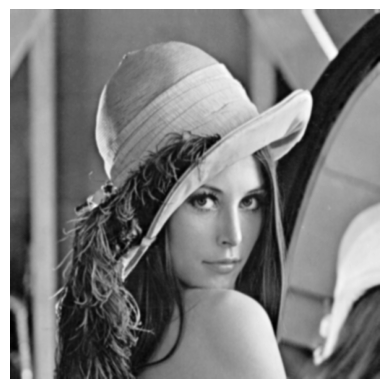

In [163]:
plt.imshow(img_S,cmap='gray')
plt.axis('off')

In [164]:
# size of image
print(img_S.shape)

(512, 512)


Hàm Sobel Filter (tìm độ lớn cạnh và hướng góc)

In [165]:
def Sobel_filters(img):
    size = img.shape
    dx = np.array(([-1, 0, 1], [-2, 0, 2], [-1, 0, 1]))
    dy = np.array(([-1, -2, -1], [0, 0, 0], [1, 2, 1]))

    # tính các pixels trong ảnh theo dx và dy
    Ix = np.zeros(img.shape)
    Iy = np.zeros(img.shape)

    
    for i in range(1, size[0] - 1):
        for j in range(1, size[1] - 1):
            Ix[i, j] = np.sum(np.multiply(img[i - 1 : i + 2, j - 1 : j + 2], dx)) # đạo hàm theo x
            Iy[i, j] = np.sum(np.multiply(img[i - 1 : i + 2, j - 1 : j + 2], dy)) # đạo hàm theo y
    
    G =  np.sqrt(Ix**2 + Iy**2) # gradient magnitude (module)
    theta = np.rad2deg(np.arctan2(Iy, Ix)) # gradient direction
    
    return (G, theta)

In [166]:
im_conv , angles = Sobel_filters(img_S)
# gradient magnitude, gradient orientation là 2 giá trị đc trả về.

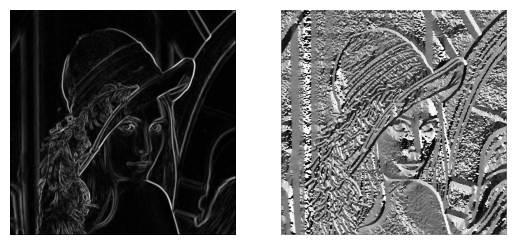

In [167]:
fig,(ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(im_conv,cmap='gray')
ax1.axis('off')
plt.axis('off')
ax2.imshow(angles,cmap='gray')

Non-Maximum Suppression

chuẩn hóa góc vector

In [168]:
angles[angles < 0] += 180

Hàm Non-Maximum Suppression

In [169]:
def non_maximum_suppression(image, angles): # làm mỏng đường nét với độ rộng 1 pixel
    size = image.shape
    suppression = np.zeros(size,dtype=np.int32)
    numRows,numCols = image.shape[0],image.shape[1]
    for r in range(1,numRows-1):
        for c in range(1,numCols-1):
            # góc tạo bởi phương vector và phương ngang thuộc vùng 0 độ
            if (0 <= angles[r,c] < 22.5) or (157.5 <= angles[r,c] <= 180):
                q, k = image[r, c+1], image[r, c-1]
            #góc tạo bởi phương vector và phương ngang thuộc vùng 45 độ
            elif (22.5 <= angles[r,c] < 67.5):
                q, k = image[r+1, c-1], image[r-1, c+1]
            #góc tạo bởi phương vector và phương ngang thuộc vùng 90 độ
            elif (67.5 <= angles[r,c] < 112.5):
                q, k = image[r+1, c], image[r-1, c]
            #góc tạo bởi phương vector và phương ngang thuộc vùng 135 độ
            elif (112.5 <= angles[r,c] < 157.5):
                q, k = image[r-1, c-1], image[r+1, c+1]

            if (image[r,c] >= q) and (image[r,c] >= k): # giữ các pixel có giá trị cực đại
                suppression[r,c] = image[r,c]
            else:
                suppression[r,c] = 0 # còn lại bỏ
    return suppression

In [170]:
nonMax_im = non_maximum_suppression(im_conv,angles)

(-0.5, 511.5, 511.5, -0.5)

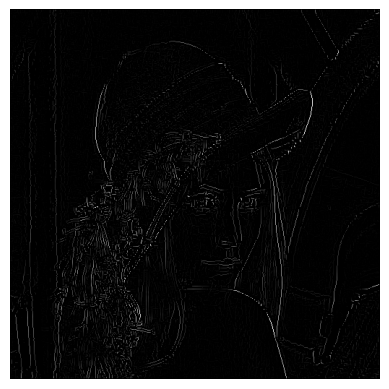

In [171]:
plt.imshow(nonMax_im,cmap='gray')
plt.axis('off')

Threshold

In [172]:
def Thresh(img, low, high): # lọc pixel thông qua giá trị cận trên và cận dưới.
    res = np.zeros(img.shape, dtype=np.int32)
    
    weak, strong = 80, 255 # khởi tạo các giá trị điểm mạnh điểm yếu
    
    sr, sc = np.where(img >= high)  # tìm các điểm mạnh
    wkr, wkc = np.where((img < high) & (img >= low)) # tìm các điểm yếu
    # điểm còn lại cho = 0
    
    # gán vào mảng res
    res[sr, sc] = strong
    res[wkr, wkc] = weak
    
    return (res, weak, strong)

In [173]:
pic, w, s = Thresh(nonMax_im, 40, 115)

(-0.5, 511.5, 511.5, -0.5)

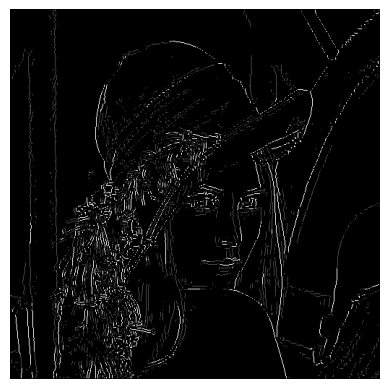

In [174]:
plt.imshow(pic,cmap='gray')
plt.axis('off')

Edge Tracking by Hysteresis

In [175]:
# Kiểm tra điều kiện Weak pixels đc phép tồn tại bằng cách xét các điểm lân cận nó.
def Condition(i,j, pix, value):
    return ((pix[i+1, j-1] == value) or (pix[i+1, j] == value) or (pix[i+1, j+1] == value) or 
    (pix[i, j-1] == value) or (pix[i, j+1] == value) or (pix[i-1, j-1] == value) or 
    (pix[i-1, j] == value) or (pix[i-1, j+1] == value))

In [176]:
def Tracking(image, weak, strong): # hàm dùng để phân loại các điểm weak dựa trên các hàng xóm lân cận.
    numRows,numCols = image.shape[0],image.shape[1]
    for r in range(1, numRows-1):
        for c in range(1, numCols-1):
            if (image[r,c] == weak):
                    if (Condition(r,c,image,strong)): #nếu có ít nhất 1 hàng xóm lân cận là mạnh thì biến điểm yếu thành mạnh
                        image[r, c] = strong
                    else: # không có thì loại điểm đó và cho nó bằng 0.
                        image[r, c] = 0
    
    return image

In [177]:
Result = Tracking(pic,w,s)

Final Result

(-0.5, 511.5, 511.5, -0.5)

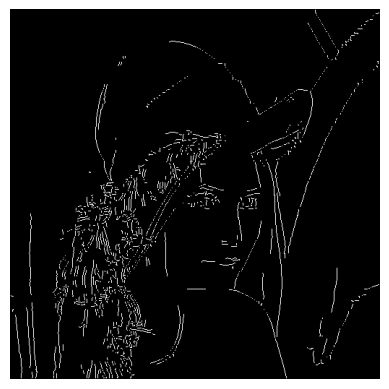

In [178]:
plt.imshow(Result,cmap='gray')
plt.axis('off')

So sánh 2 kết quả<br>
Ảnh bên trái - Hàm có sẵn trong thư viện - upper = 180, lower = 140<br>
Ảnh bên phải - Kết quả thủ tục - upper = 115, lower = 40

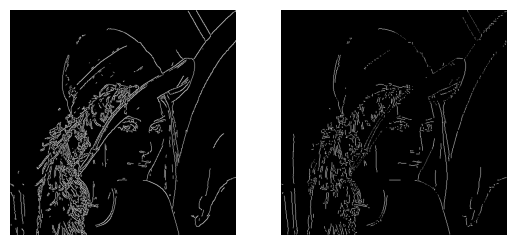

In [179]:
fig,(ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(Cannyon,cmap='gray')
ax1.axis('off')
plt.axis('off')
ax2.imshow(Result,cmap='gray')